In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/polynomial_regression_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/polynomial_regression_test.csv')

Mounted at /content/drive


In [3]:
df_train_x = df_train.iloc[:,1:-1]
df_train_x.shape

(28559, 5)

In [4]:
df_test_x = df_test.iloc[:,1:]
df_test_x.shape

(6449, 5)

In [5]:
y = df_train.iloc[:,-1]
y = y.values.reshape(y.shape[0],1)
print(y.shape)

(28559, 1)


In [6]:
x = (df_train_x - df_train_x.mean())/df_train_x.std()


In [7]:
m = x.shape[0]
n = x.shape[1]
i = 90000
a = 0.001

In [8]:
degree = 5
def poly(x, degree): #terms like x1^3*x2^4*x3 is not considered for simplicity although they would make the model more accurate
    x_poly = x.copy()
    for d in range(2, degree + 1):
        x_poly = np.hstack((x_poly, np.power(x, d)))
    interaction_terms = []
    for k in range(n):
        for l in range(k + 1, n):
            for d1 in range(1, degree + 1):
                for d2 in range(1, degree + 1):
                    if d1 + d2 <= degree:
                        interaction_terms.append((np.power(x[:, k], d1) * np.power(x[:, l], d2)).reshape(-1, 1))

    x_interaction = np.hstack(interaction_terms)
    return np.hstack((np.ones((m, 1)), x_poly, x_interaction)) #this only considers interaction between 2 terms of any degree

In [9]:
x_poly = poly(x.values, degree)
x_poly.shape

(28559, 126)

In [10]:
w = np.zeros((x_poly.shape[1],1))
w.shape

(126, 1)

In [11]:
def grad(x,y,w,a,i):
  j_hist = []
  for i in range(i):
      y_prediction = np.dot(x_poly,w)
      dj_dw = -(2/m)*np.dot(x_poly.T,(y - y_prediction))
      w = w - a*dj_dw
      j = np.mean((y - y_prediction)**2)
      j_hist.append(j)
  return w, j_hist, y_prediction

In [12]:
 w, j_hist, y_prediction = grad(x,y,w,a,i)

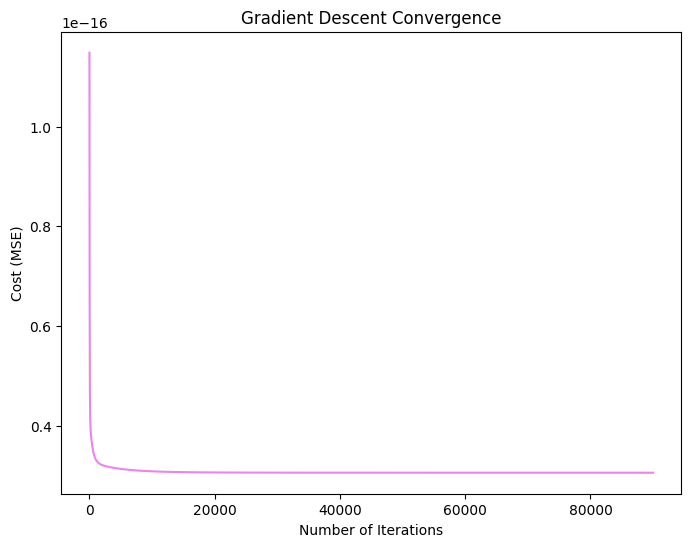

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(i), j_hist, label='Cost (MSE)', color='violet')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.show()


In [14]:
x_test = (df_test_x - df_train_x.mean())/df_train_x.std()
x_test.shape


(6449, 5)

In [15]:
m_test = x_test.shape[0]


In [16]:
degree = 5
def poly(x, degree):
    x_poly_test = x_test.copy()
    for d in range(2, degree + 1):
        x_poly_test = np.hstack((x_poly_test, np.power(x, d)))
    interaction_terms_test = []
    for k in range(n):
        for l in range(k + 1, n):
            for d1 in range(1, degree + 1):
                for d2 in range(1, degree + 1):
                    if d1 + d2 <= degree:
                        interaction_terms_test.append((np.power(x[:, k], d1) * np.power(x[:, l], d2)).reshape(-1, 1)) # this will only yeild interactions like x1x2 or x2x3
    x_interaction_test = np.hstack(interaction_terms_test)
    return np.hstack((np.ones((m_test, 1)), x_poly_test, x_interaction_test))

In [17]:
x_poly_test = poly(x_test.values ,degree)
x_poly_test.shape

(6449, 126)

In [18]:
y_prediction_test = np.dot(x_poly_test,w)
y_prediction_test.shape

(6449, 1)

In [21]:
Target_values = pd.DataFrame(y_prediction_test, columns=["Predicted Target Values"])
Target_values.to_csv('polynomial_regression_predictions.csv', index=False)
print(os.getcwd())
files.download('/content/polynomial_regression_predictions.csv')


/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
def r2_score(y, y_prediction):
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_prediction)**2)
    return 1 - (ss_residual / ss_total)

r2 = r2_score(y, y_prediction)
print(f"R^2 Score: {r2:.6f}")


R^2 Score: 0.732896
